In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# **Data Collection and Pre-Processing**

In [2]:
loan_dataset=pd.read_csv('loan_data.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset.shape

(381, 13)

In [6]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [8]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [10]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [11]:
loan_dataset=loan_dataset.dropna()

In [12]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
loan_dataset.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [14]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,0
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,1
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,1
11,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,0


In [15]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
3+,24


In [16]:
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [17]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
4,24


# **Data Visualization**

<Axes: xlabel='Education', ylabel='count'>

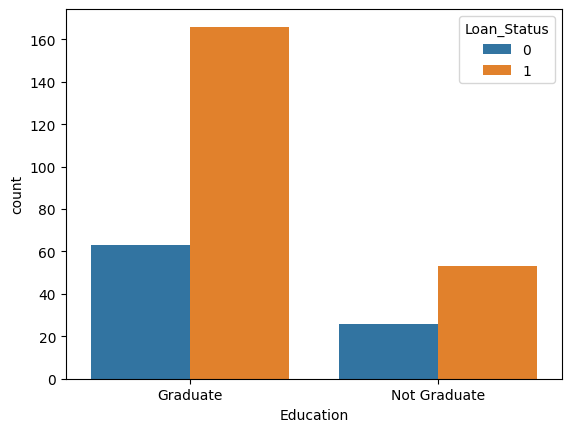

In [18]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

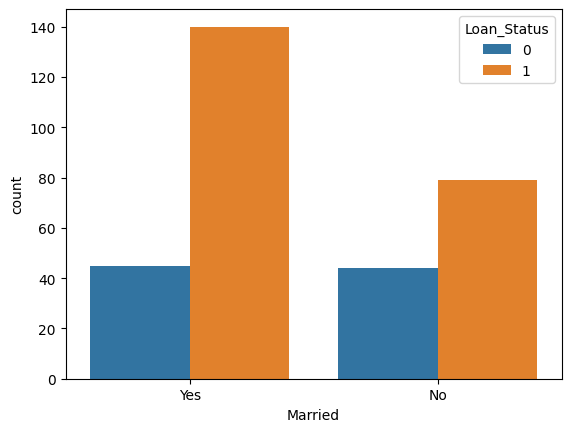

In [19]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [23]:
loan_dataset['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,123
Urban,99
Rural,86


In [25]:
loan_dataset.replace({'Married':{"No":0,'Yes':1},'Gender':{"Male":1,"Female":0},
                     'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{"Urban":0,"Rural":2,"Semiurban":1},
                     "Education":{"Graduate":1,"Not Graduate":0}}, inplace=True)

In [26]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,0,1
5,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,0,1
7,LP001029,1,0,0,1,0,1853,2840.0,114.0,360.0,1.0,2,0
8,LP001030,1,1,2,1,0,1299,1086.0,17.0,120.0,1.0,0,1
9,LP001032,1,0,0,1,0,4950,0.0,125.0,360.0,1.0,0,1
11,LP001036,0,0,0,1,0,3510,0.0,76.0,360.0,0.0,0,0


# **Model Machine Learning**

In [29]:
x=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_dataset['Loan_Status']

In [30]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,4,1,0,5703,0.0,128.0,360.0,1.0,0
377,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,2
378,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,2
379,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,2


In [31]:
y

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


# **train_test_split**

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [35]:
x_train.shape

(246, 11)

In [37]:
x_test.shape

(62, 11)

In [38]:
y_train.shape

(246,)

In [39]:
y_test.shape

(62,)

# Training The Model :
# Suport Vector Machine Model

In [40]:
model_classifier=svm.SVC(kernel='linear')

In [41]:
model_classifier.fit(x_train,y_train)

SVC(kernel='linear')

# **Model Evaluation**

In [42]:
x_train_prediction=model_classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [43]:
print(f"Accuracy on Training Data : {training_data_accuracy}")

Accuracy on Training Data : 0.8577235772357723


In [44]:
x_test_prediction=model_classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [45]:
print(f"Accuracy on Testing Data : {testing_data_accuracy}")

Accuracy on Testing Data : 0.7580645161290323
